In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-gene-expression-profiles-metabric/METABRIC_RNA_Mutation.csv


# Using Gene Expression Profile to Make Breast Cancer Survival by Machine Learning Model 

### Context 

Breast cancer ranks one of the most popular illness affecting many women all over the world. Numerous women face the severe consequences of this disease, leading to significant number of cancer-related deaths. Accoding to research reports in 2018, approximately 627.000 women died from breast cancer. 

The most important part of the diagnosis process acurately estimate prognosis and survival duration. We need to answer the question why breast cancer patients with the same stage of disease and the same clinical characteristics can experience different treatment reponses and overal survival. 

Genetics abnormalities are known to be a contributing factor in the development of cancer. The level of 
gene expression in tissue and information of it's complex activities were recorded.Beside comparing the genes expressed in normal and diseased tissue can bring the valuable insight about the reason of cancer. Using machine learning techniques to predict whether the woman have cancer or not can help doctor diagnose the desease more accurately and reduce the need of some redundant surgical and treatment procedure 



### Objective 
The aim of this project is to predict breast cancer survival using machine learning models with clinical data and gene expression profiles. 

The dataset used in this project is the Molecular Taxanomy of Breast Cancer Internationcal Consortium (METABRIC) database, which is contained the targeted sequencing data of 1980 primary breast cancer samples.

### Clinical attributes in the dataset: 

| Name                           | Type   | Description |
|--------------------------------|--------|-------------|
| patient_id                     | object | Patient ID  |
| age_at_diagnosis               | float  |    Age of the patient at diagnosis time         |
| type_of_breast_surgery         | object | Breast cancer surgery type: 1-  MASTECTOMY, which refers to a surgery to remove all breast tissue from a breast as a way to treat or prevent breast cancer.  2- BREAST CONSERVING, which refers to a urgery where only the part of the breast that has cancer is removed     |
| cancer_type                    | object | Breast cancer types: 1- Breast Cancer or  2- Breast Sarcoma           |
| cancer_type_detailed           | object | Detailed Breast cancer types: 1- Breast Invasive Ductal Carcinoma 2- Breast Mixed Ductal and Lobular Carcinoma 3- Breast Invasive Lobular Carcinoma  4- Breast Invasive Mixed Mucinous Carcinoma 5- Metaplastic Breast Cancer   |
| cellularity                    | object | Cancer cellularity post chemotherapy, which refers to the amount of tumor cells in the specimen and their arrangement into clusters         |
| chemotherapy                   | int    |  Whether or not the patient had chemotherapy as a treatment (yes/no)    |
| pam50_+_claudin-low_subtype    | object |  Pam 50: is a tumor profiling test that helps show whether some estrogen receptor-positive (ER-positive), HER2-negative breast cancers are likely to metastasize (when breast cancer spreads to other organs). The claudin-low breast cancer subtype is defined by gene expression characteristics, most prominently: Low expression of cell–cell adhesion genes, high expression of epithelial–mesenchymal transition (EMT) genes, and stem cell-like/less differentiated gene expression patterns       |
| cohort                         | float  |  Cohort is a group of subjects who share a defining characteristic (It takes a value from 1 to 5)        |
| er_status_measured_by_ihc      | float  |  To assess if estrogen receptors are expressed on cancer cells by using immune-histochemistry (a dye used in pathology that targets specific antigen, if it is there, it will give a color, it is not there, the tissue on the slide will be colored)  (positive/negative)         |
| er_status                      | object |   Cancer cells are positive or negative for estrogen receptors          |
| neoplasm_histologic_grade      | int  |  Determined by pathology by looking the nature of the cells, do they look aggressive or not  (It takes a value from 1 to 3)         |
| her2_status_measured_by_snp6   | object | To assess if the cancer positive for HER2 or not by using advance molecular techniques (Type of next generation sequencing)       |
| her2_status                    | object |   Whether the cancer is positive or negative for HER2          |
| tumor_other_histologic_subtype | object |  Type of the cancer based on microscopic examination of the cancer tissue (It takes a value of  'Ductal/NST', 'Mixed', 'Lobular', 'Tubular/ cribriform', 'Mucinous', 'Medullary', 'Other', 'Metaplastic'  )      |
| hormone_therapy                | int |   Whether or not the patient had hormonal as a treatment (yes/no)           |
| inferred_menopausal_state      | object |  Whether the patient is  is post menopausal or not   (post/pre)        |
| integrative_cluster            | object | Molecular subtype of the cancer based on some gene expression (It takes a value from '4ER+', '3', '9', '7', '4ER-', '5', '8', '10', '1', '2', '6')            |
| primary_tumor_laterality       | object |   Whether it is involving the right breast or the left breast           |
| lymph_nodes_examined_positive  | float  |  To take samples of the lymph node during the surgery and see if there were involved by the cancer            |
| mutation_count                 | float  |  Number of gene that has relevant mutations            |
| nottingham_prognostic_index    | float  |   It is used to determine prognosis following surgery for breast cancer. Its value is calculated using three pathological criteria: the size of the tumour; the number of involved lymph nodes; and the grade of the tumour.          |
| oncotree_code                  | object |  The OncoTree is an open-source ontology that was developed at Memorial Sloan Kettering Cancer Center (MSK) for standardizing cancer type diagnosis from a clinical perspective by assigning each diagnosis a unique OncoTree code.           |
| overall_survival_months        | float  |  Duration from the time of the intervention to death        |
| overall_survival               | object |   Target variable wether the patient is alive of dead.          |
| pr_status                      | object |    Cancer cells are positive or negative for progesterone  receptors          |
| radio_therapy                  | int    | Whether or not the patient had radio as a treatment (yes/no)             |
| 3-gene_classifier_subtype      | object | Three Gene classifier subtype It takes a value from 'ER-/HER2-', 'ER+/HER2- High Prolif', nan, 'ER+/HER2- Low Prolif','HER2+'           |
| tumor_size                     | float  | Tumor size measured by imaging techniques            |
| tumor_stage                    | float  | Stage of the cancer based on the involvement of surrounding structures, lymph nodes and distant spread          |
| death_from_cancer              | int  |  Wether the patient's death was due to cancer or not (yes/no) 

### Import the Necessary Libraries

In [232]:
# Basic libraries 
import numpy as np 
import pandas as pd 
from scipy import stats 

# Visualisation libraries
import matplotlib.pyplot as plt 
import matplotlib 
import seaborn as sns 
import yellowbrick as yb 
from matplotlib.colors import ListedColormap 
from matplotlib_venn import venn3 
import matplotlib.patches as mpatches

# preprocessing, metrics, statistic 
from scipy.stats import normaltest, test 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler 
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, accuracy_score, f1_score 
from sklearn.metrics import mean_squared_log_error 
from sklearn.metrics import classification_report, confusion_matrix 
from scipy.special import boxcox, inv_boxcox

#Modeling libraries 
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV 
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV, StratifiedKFold, cross_val_predict, KFold 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.svm import SVC 
from sklearn.metrics import roc_curve, auc 
from sklearn.decomposition import PCA 
from scipy.stats import zscore 
from itertools import combinations 
from xgboost.sklearn import XGBClassifier 
from sklearn.ensemble import IsolationForest 
import kmapper as km 
from sklearn.cluster import KMeans 

color= "Spectral"
color_plt = ListedColormap(sns.color_palette(color).as_hex())
color_hist = 'teal'
two_colors = [ sns.color_palette(color)[0], sns.color_palette(color)[5]]
three_colors = [ sns.color_palette(color)[5],sns.color_palette(color)[2], sns.color_palette(color)[0]]

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, cross_val_predict, KFold

In [233]:
clinical_df = pd.read_csv("/kaggle/input/breast-cancer-gene-expression-profiles-metabric/METABRIC_RNA_Mutation.csv")
clinical_df

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,7295,43.10,BREAST CONSERVING,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,LumA,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1900,7296,42.88,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1901,7297,62.90,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1902,7298,61.16,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0


### Read the Dataset 

In [234]:
# Understand the data shape 
print(f"There are {clinical_df.shape[0]} rows and {clinical_df.shape[1]} columns")

There are 1904 rows and 693 columns


In [235]:
# Review the first 5 rows of the data 
clinical_df.head(5)

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


### Printing the Information 

In [236]:
clinical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 693 entries, patient_id to siah1_mut
dtypes: float64(498), int64(5), object(190)
memory usage: 10.1+ MB


In [237]:
clinic_df = pd.DataFrame(clinical_df.isnull().sum()).reset_index()
clinic_df = clinic_df[clinic_df[0] != 0]
clinic_df["Percentage_Mising_value"] = [round(i/clinical_df.shape[0]*100,2) for i in clinic_df[0]]
clinic_df

,index,0,Percentage_Mising_value
2,type_of_breast_surgery,22,1.16
4,cancer_type_detailed,15,0.79
5,cellularity,54,2.84
9,er_status_measured_by_ihc,30,1.58
11,neoplasm_histologic_grade,72,3.78
14,tumor_other_histologic_subtype,15,0.79
18,primary_tumor_laterality,106,5.57
20,mutation_count,45,2.36
22,oncotree_code,15,0.79
27,3-gene_classifier_subtype,204,10.71


Among the 693 observations and 1930 columns in the dataset, several attributes have missing values. Notably, the "tumor_stage" attribute stands out with the highest proportion of missing values, accounting for 26.31% of its entries. In contrast, the "tumor_other_histologic_subtype" and "cancer_type_detailed" attributes have a relatively lower percentage of missing values, at 0.79%.

In [238]:
# Checking the unique values in each column
clinical_nunique = clinical_df.nunique()
df_unique = pd.DataFrame({"Attribute": clinical_nunique.index , "Unique_value": clinical_nunique.values})
df_unique

,Attribute,Unique_value
0,patient_id,1904
1,age_at_diagnosis,1572
2,type_of_breast_surgery,2
3,cancer_type,2
4,cancer_type_detailed,6
...,...,...
688,hras_mut,4
689,prps2_mut,3
690,smarcb1_mut,4
691,stmn2_mut,3


<Axes: >

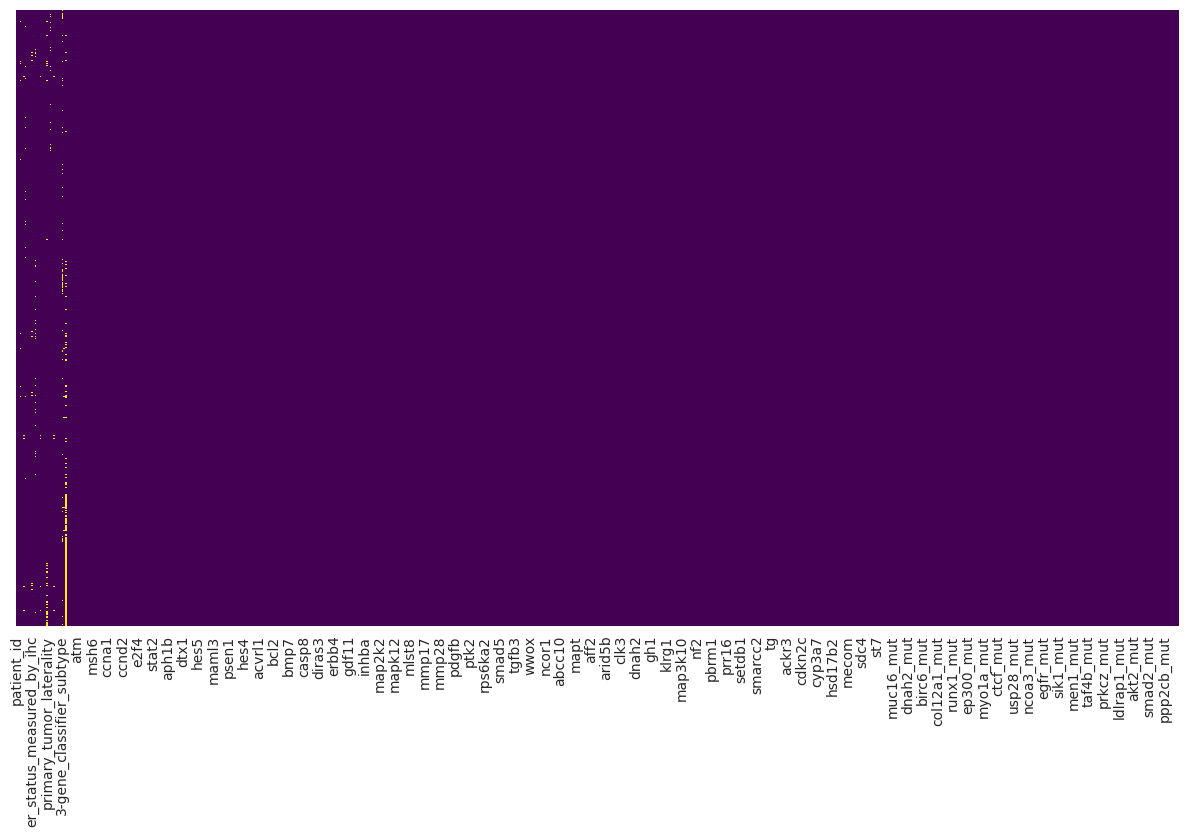

In [239]:
# Visualization of missing data 
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 8))

# Use clinical_df.isnull() to create a Boolean mask for missing values
sns.heatmap(clinical_df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In clinical dataset, we observed the missing data for various attributes. Especially, the tumor stage attribute has relatively up to 26% of missing data, while the '3 genes classifier subtype' is missing 11% of missing data. The remainning nine attributes in the missing data table has less than 6% missing data. In conclusion, however there are some missing values in the dataset, it can be considered relatively complete in the most attributes  

In [240]:
# Summary statistic 
clinical_df.describe().transpose().head()

,count,mean,std,min,25%,50%,75%,max
patient_id,1904.0,3921.982143,2358.478332,0.00,896.500,4730.50,5536.2500,7299.00
age_at_diagnosis,1904.0,61.087054,12.978711,21.93,51.375,61.77,70.5925,96.29
chemotherapy,1904.0,0.207983,0.405971,0.00,0.000,0.00,0.0000,1.00
cohort,1904.0,2.643908,1.228615,1.00,1.000,3.00,3.0000,5.00
neoplasm_histologic_grade,1832.0,2.415939,0.650612,1.00,2.000,3.00,3.0000,3.00


## Exploratory Data Analysis and Data Visualization 

### 1/ Create the relationship between clinical attribute and outcome 

##### Create the new dataframe containing only clinical attributes 

In [241]:
clinical_attribute_drop = clinical_df.columns[31:]
clinical_attribute = clinical_df.drop(clinical_attribute_drop, axis = 1)
clinical_attribute

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,7295,43.10,BREAST CONSERVING,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,LumA,4.0,Positve,...,5.050,ILC,196.866667,1,Positive,1,ER+/HER2- Low Prolif,25.0,NaN,Living
1900,7296,42.88,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,5.040,IDC,44.733333,0,Negative,1,NaN,20.0,NaN,Died of Disease
1901,7297,62.90,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,6.050,IDC,175.966667,0,Positive,1,NaN,25.0,NaN,Died of Disease
1902,7298,61.16,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,4.0,Positve,...,5.050,IDC,86.233333,0,Positive,0,ER+/HER2- High Prolif,25.0,NaN,Died of Other Causes


In [242]:
clinical_attribute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   patient_id                      1904 non-null   int64  
 1   age_at_diagnosis                1904 non-null   float64
 2   type_of_breast_surgery          1882 non-null   object 
 3   cancer_type                     1904 non-null   object 
 4   cancer_type_detailed            1889 non-null   object 
 5   cellularity                     1850 non-null   object 
 6   chemotherapy                    1904 non-null   int64  
 7   pam50_+_claudin-low_subtype     1904 non-null   object 
 8   cohort                          1904 non-null   float64
 9   er_status_measured_by_ihc       1874 non-null   object 
 10  er_status                       1904 non-null   object 
 11  neoplasm_histologic_grade       1832 non-null   float64
 12  her2_status_measured_by_snp6    19

In [243]:
clinical_df.select_dtypes(include = np.number)

,patient_id,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
0,0,75.65,0,1.0,3.0,1,10.0,NaN,6.044,140.500000,...,-1.1877,-0.0194,-1.6345,-0.2142,-0.5698,-1.1741,-1.4779,-0.5954,-0.8847,-0.3354
1,2,43.19,0,1.0,3.0,1,0.0,2.0,4.020,84.633333,...,-0.4412,0.4534,0.4068,0.7634,0.0231,0.9121,-0.9538,-0.2264,0.5398,-0.8920
2,5,48.87,1,1.0,2.0,1,1.0,2.0,4.030,163.700000,...,-0.5381,0.0668,0.8344,1.7227,0.4024,-3.7172,-1.5538,1.3701,-0.1078,0.3655
3,6,47.68,1,1.0,2.0,1,3.0,1.0,4.050,164.933333,...,-0.5630,-0.7078,0.8228,0.6819,-0.1948,-2.3286,-0.9924,-0.3154,0.2320,-0.4828
4,8,76.97,1,1.0,3.0,1,8.0,2.0,6.080,41.366667,...,-0.5845,-0.3544,-1.0150,2.2961,0.1817,-0.1572,0.0427,5.0048,3.8476,1.3223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,7295,43.10,0,4.0,3.0,1,1.0,4.0,5.050,196.866667,...,0.7859,1.5304,1.1196,0.8116,0.0958,-1.2644,-0.3566,-0.2615,-0.6371,-0.5540
1900,7296,42.88,0,4.0,3.0,0,1.0,6.0,5.040,44.733333,...,-0.5294,-0.6610,-0.1610,0.2251,0.5127,-0.3412,-1.0703,-0.6950,0.0641,-0.8863
1901,7297,62.90,0,4.0,3.0,1,45.0,4.0,6.050,175.966667,...,-0.1457,-0.5194,2.3968,0.5917,-0.8643,-1.3541,-1.8076,-0.1840,0.0967,-0.6264
1902,7298,61.16,0,4.0,2.0,1,12.0,15.0,5.050,86.233333,...,-0.6380,-1.5275,1.1070,0.2194,1.4317,-0.6985,-0.6046,-0.4915,-0.2847,-0.8041


In [16]:
def standard_scaler(df):
    attribute = df[df.select_dtypes(include = 'number').columns.tolist()]
    ss = StandardScaler()
    std = ss.fit_transform(attribute)
    std_df = pd.DataFrame(std, columns = attribute.columns, index = attribute.index)
    return std_df

In [17]:
# The dataframe just contains the clinical attributes  
attribute_num = clinical_df[clinical_df.columns[:31]]
attribute_num

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,7295,43.10,BREAST CONSERVING,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,LumA,4.0,Positve,...,5.050,ILC,196.866667,1,Positive,1,ER+/HER2- Low Prolif,25.0,NaN,Living
1900,7296,42.88,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,5.040,IDC,44.733333,0,Negative,1,NaN,20.0,NaN,Died of Disease
1901,7297,62.90,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,6.050,IDC,175.966667,0,Positive,1,NaN,25.0,NaN,Died of Disease
1902,7298,61.16,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,4.0,Positve,...,5.050,IDC,86.233333,0,Positive,0,ER+/HER2- High Prolif,25.0,NaN,Died of Other Causes


Text(0.5, 1.0, 'The Distribution of Clinical Attributes')

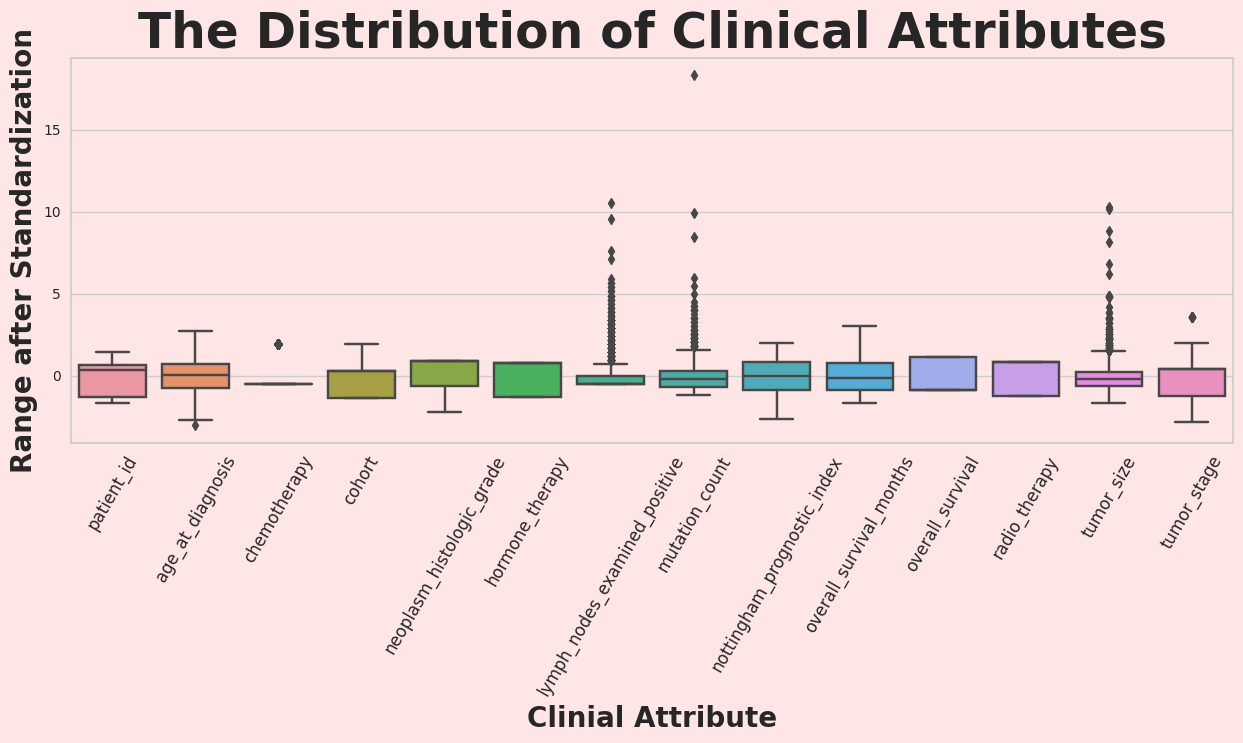

In [18]:
attributes = standard_scaler(attribute_num)
attribute_df = pd.melt(attributes)

# Visualizing these attributes
fig, ax = plt.subplots(1,1, figsize = (15,5))
sns.boxplot(x = 'variable', y = 'value', data = attribute_df)
plt.xlabel('Clinial Attribute', fontsize = 20, fontweight = 'bold')
plt.ylabel("Range after Standardization", fontsize = 20, fontweight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 12, rotation = 60)

background_color = '#ffe6e6'
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)
plt.title('The Distribution of Clinical Attributes', fontsize = 35, fontweight = 'bold')



We examined the distribution of numerical attributes within our dataset. While the majority of attributes exhibit a normal distribution, we found that some, such as 'lymph_nodes_examine_positive,' 'hormone_therapy,' and 'tumor_size,' display right-skewed data, indicating the presence of numerous outliers. Given the significance of these attributes in our prediction process, we have chosen to retain these outliers for analysis


In [19]:
attribute_df

,variable,value
0,patient_id,-1.663366
1,patient_id,-1.662518
2,patient_id,-1.661245
3,patient_id,-1.660821
4,patient_id,-1.659973
...,...,...
26651,tumor_stage,NaN
26652,tumor_stage,NaN
26653,tumor_stage,NaN
26654,tumor_stage,NaN


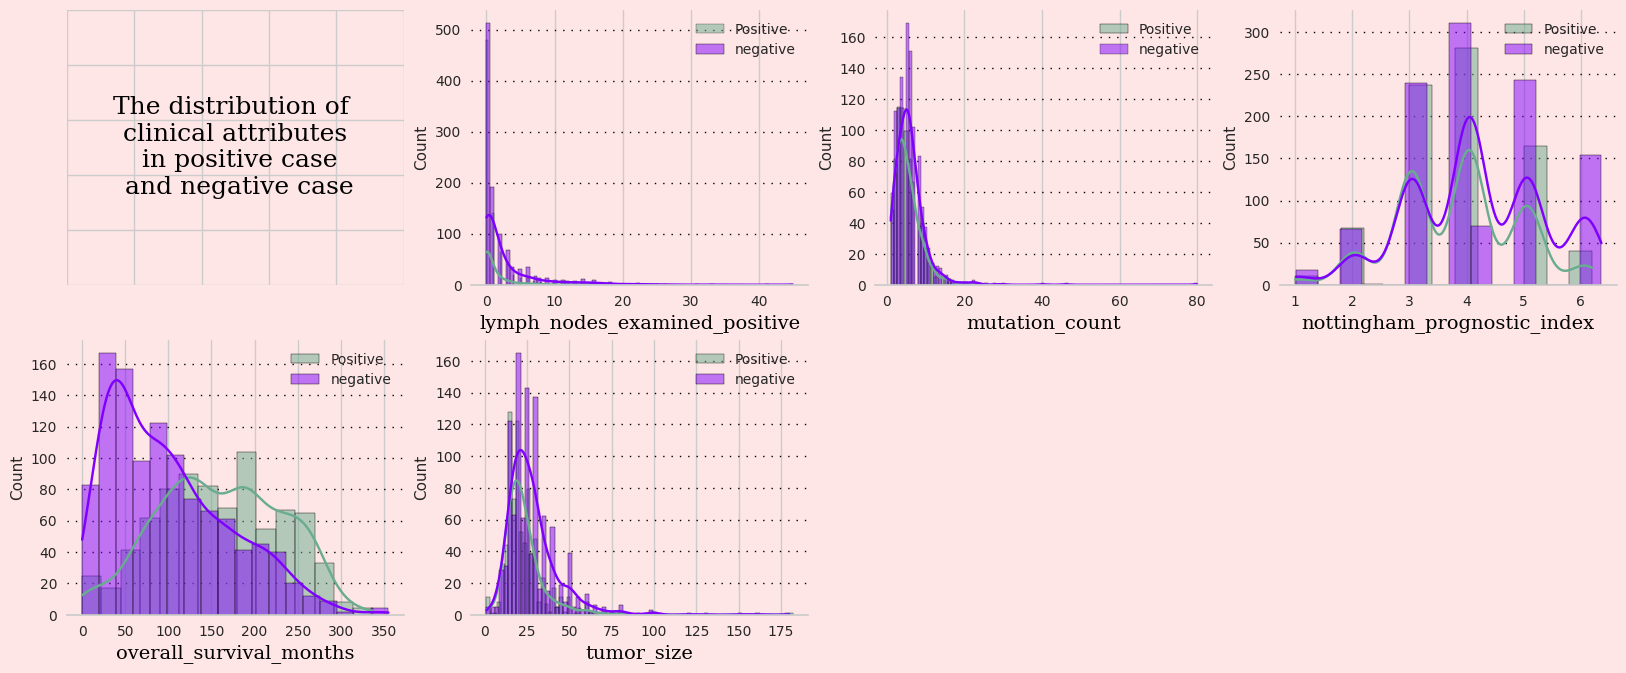

In [20]:
# The distribution of numerical clinical attributes first 
fig = plt.figure(figsize = (20, 25))
background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color)
columns = ['age_at_diagnosis', 'lymph_nodes_examined_positive', 'mutation_count', 'nottingham_prognostic_index', 'overall_survival_months', 'tumor_size']

for index, column in enumerate(columns):
    ax = plt.subplot(6,4,index + 1)
    if index == 0:
        ax.text(0.5, 0.5, "The distribution of \nclinical attributes\n in positive case\n and negative case",
               horizontalalignment = 'center',
               verticalalignment= 'center', 
               fontsize = 18, fontfamily = 'serif', color = '#000000')
        ax.set_facecolor(background_color)
        ax.spines['bottom'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.tick_params(left = False, right = False )
        continue
    sns.histplot(x= clinical_df[clinical_df['overall_survival'] == 1][column], kde = True, color=color_palette[2], label='Positive')
    sns.histplot(x = clinical_df[clinical_df['overall_survival'] == 0][column], kde = True, color=color_palette[1], label = 'negative')
    
    ax.legend()
    
    ax.set_xlabel(column, fontsize = 14, fontfamily = 'serif', color = '#000000')
    ax.set_facecolor(background_color)
    ax.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

    for s in ['top','right', 'left']:
        ax.spines[s].set_visible(False)
    
    
    
    


Regarding certain attributes, there doesn't appear to be a noticeable difference between individuals with the disease and those without the disease. This suggests that these attributes may not significantly impact the experimental outcomes.

The 'mutation count' attribute displays a right-skewed distribution, with most values falling between 0 and 20.

The 'mutation size' attribute also shows a right-skewed distribution, indicating that mutation sizes range from 0 to 75.

The 'survival month' attribute is right-skewed, suggesting that breast cancer patients can survive anywhere from 50 to 200 days.

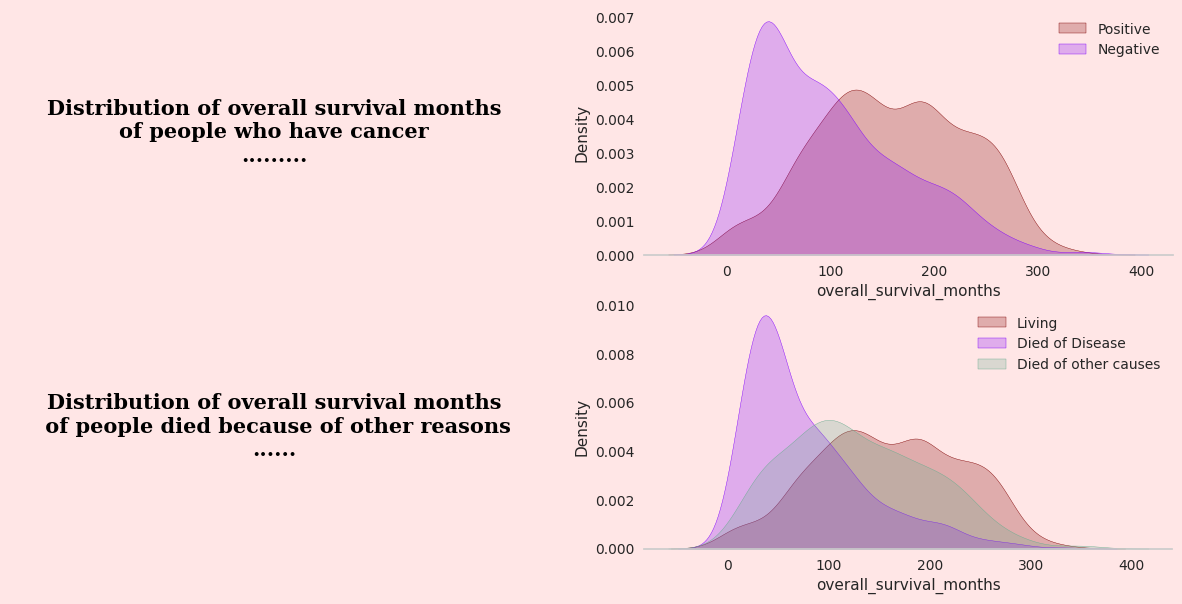

In [21]:
clinical_attribute = clinical_df.copy()
fig, ax = plt.subplots(2,2, figsize = (15,7))
background_color = "#ffe6e6"
color_palette = ["#800000", "#8000ff", "#6aac90", "#5833ff", "#da8829"]
fig.patch.set_facecolor(background_color)

title = ['Distribution of overall survival months\nof people who have cancer\n.........',
        'Distribution of overall survival months\n of people died because of other reasons\n......']
for i, til in enumerate(title):
    ax[i,0].text(0.5,0.5, til, 
                horizontalalignment = 'center',
                verticalalignment = 'center',
                fontsize = 15,
                fontweight = 'bold',
                fontfamily = 'serif', 
                color = '#000000')
    ax[i,0].spines['bottom'].set_visible(False)
    ax[i,0].set_xticklabels([])
    ax[i,0].set_yticklabels([])
    ax[i,0].tick_params(left = False, bottom = False)
    ax[i,0].set_facecolor(background_color)
    ax[i,0].grid(False)


sns.kdeplot(clinical_attribute[clinical_attribute['overall_survival'] == 1]['overall_survival_months'] ,ax = ax[0,1], fill = True, label = 'Positive', color = color_palette[0])
sns.kdeplot(clinical_attribute[clinical_attribute['overall_survival'] == 0]['overall_survival_months'] ,ax = ax[0,1], fill = True, label = 'Negative', color = color_palette[1])
ax[0,1].set_facecolor(background_color)
ax[0,1].legend()
ax[0,1].grid(False)

sns.kdeplot(clinical_attribute[clinical_attribute['death_from_cancer'] == 'Living']['overall_survival_months'], ax = ax[1,1], fill = True, label = 'Living', color = color_palette[0])
sns.kdeplot(clinical_attribute[clinical_attribute['death_from_cancer'] == 'Died of Disease']['overall_survival_months'], ax = ax[1,1], fill = True, label = 'Died of Disease', color = color_palette[1])
sns.kdeplot(clinical_attribute[clinical_attribute['death_from_cancer'] == 'Died of Other Causes']['overall_survival_months'], ax = ax[1,1], fill = True, label = 'Died of other causes', color = color_palette[2])
ax[1,1].set_facecolor(background_color)
ax[1,1].grid(False)

plt.legend()
for x in [(0,0), (1,0), (0,1), (1,1)]:
    for i in ['top', 'left', 'right']:
        ax[x].spines[i].set_visible(False)

plt.show()


The distribution of survival durations for individuals with breast cancer appears to be left-skewed, indicating that a significant portion of them may have shorter survival periods.

In contrast, the distribution of survival durations for people with other diseases shows a more normal distribution, suggesting that their survival durations vary in a relatively balanced manner.

This observation suggests that, on average, individuals with breast cancer may have shorter survival durations compared to individuals with other diseases.

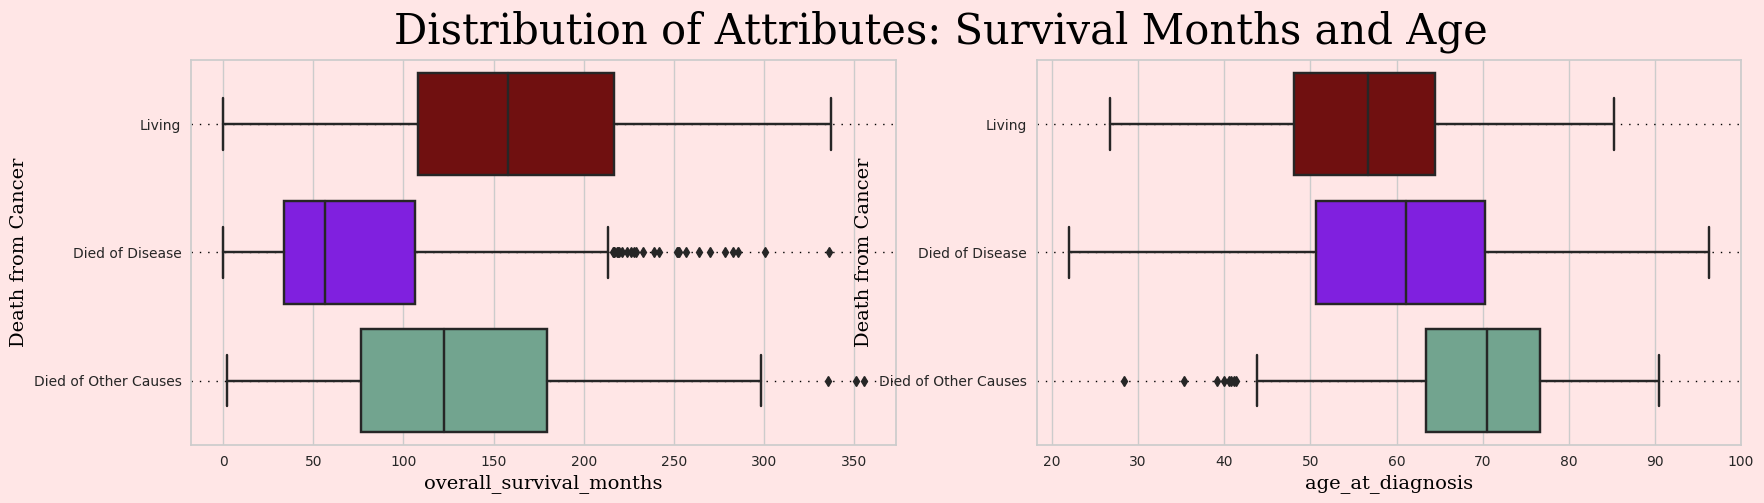

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(20, 5))
background_color = "#ffe6e6"
color_palette = ["#800000", "#8000ff", "#6aac90", "#5833ff", "#da8829"]
fig.patch.set_facecolor(background_color)

columns = ['overall_survival_months', 'age_at_diagnosis']

for i, column in enumerate(columns):
    ax = plt.subplot(1, 2, i + 1)
    sns.boxplot(x=column, y='death_from_cancer', data=clinical_df, palette=color_palette)
    
    ax.set_xlabel(column, fontsize=14, fontfamily='serif', color='#000000')
    ax.set_ylabel('Death from Cancer', fontsize=14, fontfamily='serif', color='#000000')
    ax.set_facecolor(background_color)
    ax.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1, 5))

plt.suptitle("Distribution of Attributes: Survival Months and Age", fontsize=30, fontfamily='serif', color='#000000')

plt.show()


The average age of individual who passed way from breast cancer at the age of 60 was lower than people who died from other diseases. 
While people who died from other causes typically survived for approximately 100 to 170 months, those who lost their lives to breast cancer only lived around 60 months 

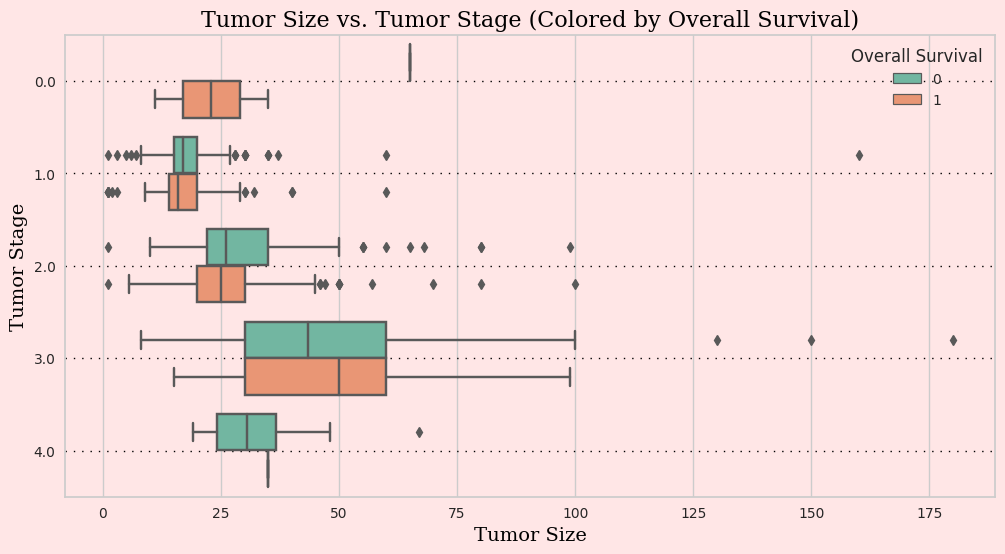

In [23]:
# Set the figure size and background color
fig, ax = plt.subplots(figsize=(12, 6))
background_color = "#ffe6e6"
fig.patch.set_facecolor(background_color)

# Create a horizontal boxplot with hue (overall_survival)
sns.boxplot(x="tumor_size", y="tumor_stage", hue='overall_survival', data=clinical_attribute, orient='h', palette="Set2")

# Set labels and styling
ax.set_xlabel("Tumor Size", fontsize=14, fontfamily='serif', color='#000000')
ax.set_ylabel('Tumor Stage', fontsize=14, fontfamily='serif', color='#000000')
ax.set_facecolor(background_color)
ax.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1, 5))

# Set a meaningful title
ax.set_title("Tumor Size vs. Tumor Stage (Colored by Overall Survival)", fontsize=16, fontfamily='serif', color='#000000')

# Add a legend
ax.legend(title='Overall Survival', loc='upper right')

plt.show()



As the tumor stage advances, there is a gradual increase in tumor size. The largest tumors are typically observed in the 2nd and 3rd stages of cancer. It is worth noting that the tumor size in the 4th stage is not larger than those in these earlier stages. Notably, individuals who receive negative test results tend to have smaller tumors compared to those with breast cancer.

In [25]:
non_therapy = clinical_attribute[
    (clinical_attribute['hormone_therapy'] == 0)
    & (clinical_attribute['radio_therapy'] == 0)& 
    (clinical_attribute['chemotherapy'] == 0)]
print(f"Number of people have no therapy {non_therapy.shape[0]}")
print(f"Average number of people have no therapy but still alive {non_therapy['overall_survival'].mean():.2%}")
print(f"Average number of people alive whatever methods they use {clinical_attribute['overall_survival'].mean():.2%}")

Number of people have no therapy 289
Average number of people have no therapy but still alive 38.06%
Average number of people alive whatever methods they use 42.07%


In [26]:
clinical_attribute[clinical_attribute.overall_survival == 1]

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
6,14,56.45,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
11,39,70.91,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1882,7276,61.27,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1883,7277,56.78,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1886,7280,63.50,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1897,7293,56.90,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0


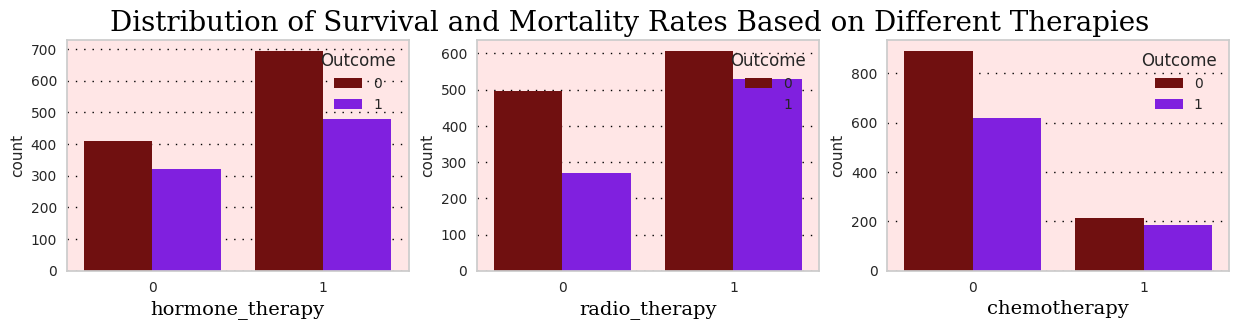

In [27]:
fig, ax = plt.subplots(ncols=3, figsize=(15, 3))
therapy_list = ['hormone_therapy', 'radio_therapy', 'chemotherapy']

for i in range(len(therapy_list)):
    sns.countplot(data=clinical_attribute, hue='overall_survival', x=therapy_list[i], palette=color_palette, ax=ax[i])

# Set labels and titles
for i in range(len(therapy_list)):
    ax[i].set_xlabel(therapy_list[i], fontsize=14, fontfamily='serif', color='#000000')
    ax[i].set_facecolor(background_color)
    ax[i].grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
    ax[i].legend(title='Outcome', title_fontsize='12', loc='upper right')

# Set the title for the entire figure
fig.suptitle("Distribution of Survival and Mortality Rates Based on Different Therapies",
            fontsize=20, fontfamily="serif", color='#000000')

# Show the plot
plt.show()


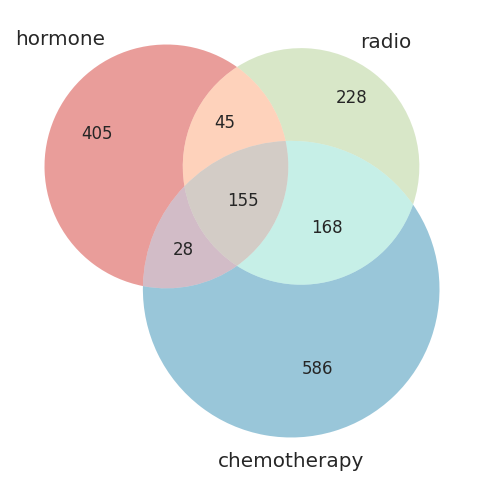

In [42]:
filter_df = []
boolean = [[True, False, False], [False, True, False], [False, False, True], [True, True, False], [True, False, True], [False, True, True], [True,True,True]]
for i in range(len(boolean)):
    filter = clinical_attribute[(clinical_attribute["hormone_therapy"] == boolean[i][0]) &
                               (clinical_attribute["radio_therapy"] == boolean[i][1]) &
                               (clinical_attribute["chemotherapy"] == boolean[i][2])]
    filter_df.append(filter.shape[0])
plt.subplots(figsize = (8,6))
v = venn3(subsets = filter_df, set_labels = ("hormone", "radio", "chemotherapy"))


Many individuals tend to opt for hormone therapy and radiotherapy over chemotherapy when it comes to treating breast cancer. It's important to highlight that those who undergo these therapies for breast cancer have a relatively high likelihood of survival than the patients who do not have any therapy. Looking to the vdiagram, most of patients either have chemo, anc hormaonal thrapy or chemo and radio therapy. There was a group of 289 patients who did not undergo any of the three treatment appearantly have slightly lower survival rate.

In [52]:
clinical_attribute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 693 entries, patient_id to siah1_mut
dtypes: float64(498), int64(5), object(190)
memory usage: 10.1+ MB


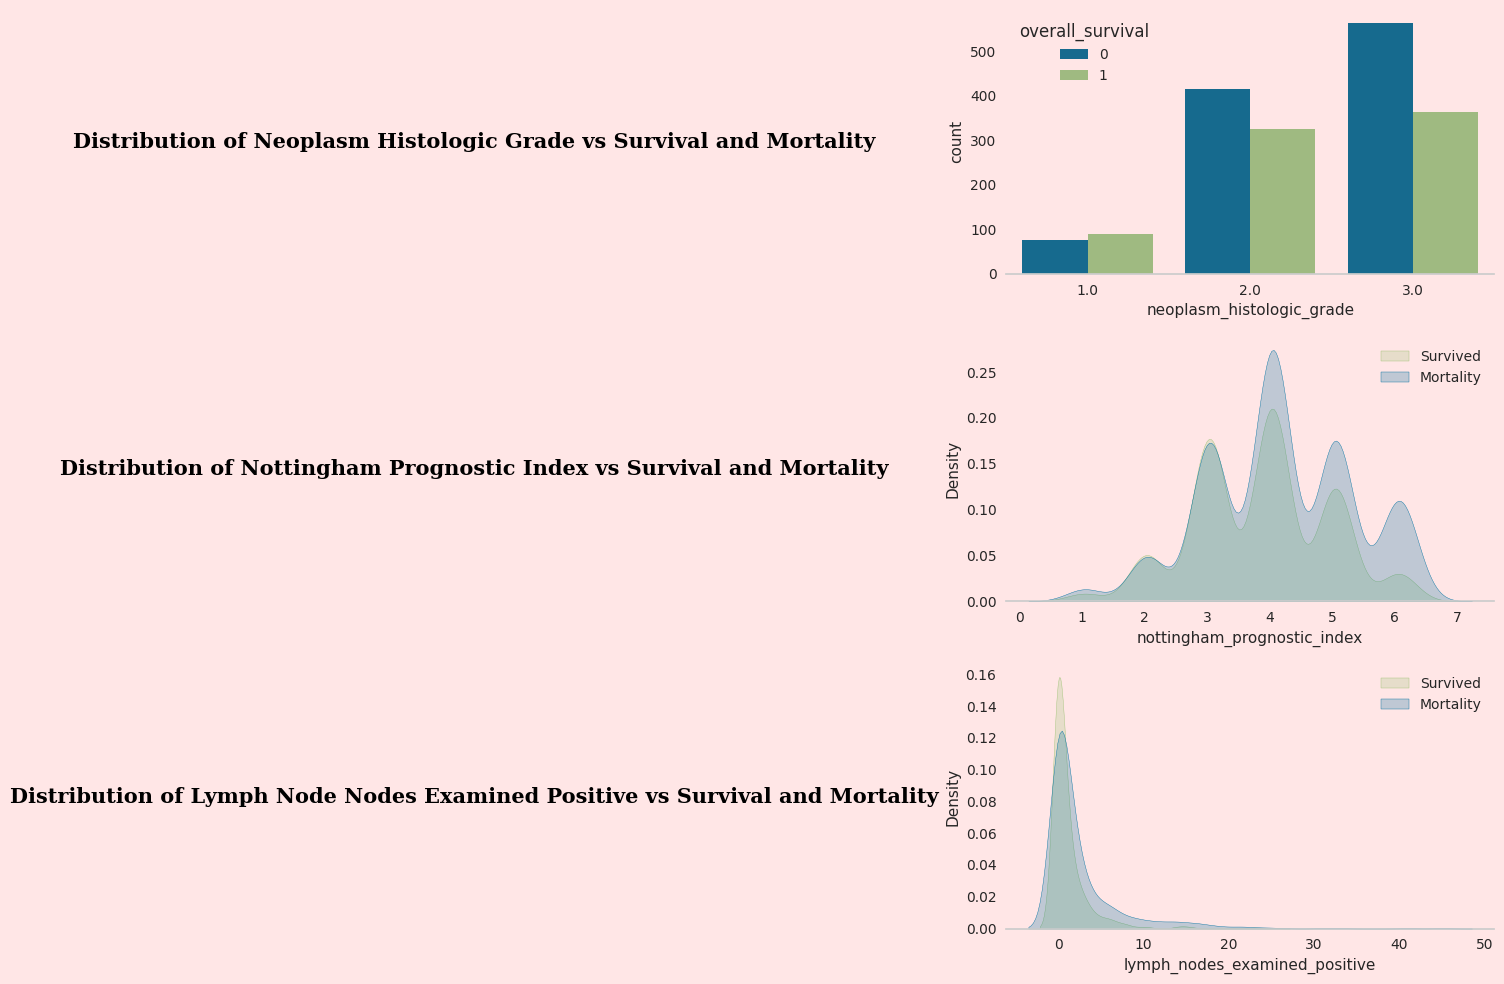

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 3x2 subplot grid with a specific background color
fig, ax = plt.subplots(3, 2, figsize=(15, 10))
background_color = "#ffe6e6"
fig.patch.set_facecolor(background_color)

# Assuming you have a DataFrame named clinical_attribute

# Plot a countplot for neoplasm_histologic_grade vs. overall_survival in the first subplot (0,1)
sns.countplot(x="neoplasm_histologic_grade", hue='overall_survival', data=clinical_attribute, ax=ax[0, 1])

# Plot KDE plots for Nottingham Prognostic Index and Lymph Nodes Examined Positive in the second and third subplots (1,1) and (2,1)
sns.kdeplot(data=clinical_attribute, hue='overall_survival', x='nottingham_prognostic_index', ax=ax[1, 1], fill=True)
ax[1, 1].legend(labels=['Survived', 'Mortality'])

sns.kdeplot(data=clinical_attribute, hue='overall_survival', x='lymph_nodes_examined_positive', ax=ax[2, 1], fill=True)
ax[2, 1].legend(labels = ['Survived', 'Mortality'])

# Set the background color, legend, and grid properties for the right column subplots
for i in range(3):
    ax[i, 1].set_facecolor(background_color)
    ax[i, 1].grid(False)

# Titles for the left column subplots
titles = ['Distribution of Neoplasm Histologic Grade vs Survival and Mortality',
          'Distribution of Nottingham Prognostic Index vs Survival and Mortality',
          'Distribution of Lymph Node Nodes Examined Positive vs Survival and Mortality']

# Set titles and formatting for the left column subplots
for i, title in enumerate(titles):
    ax[i, 0].text(0.5, 0.5, title,
                 horizontalalignment='center',
                 verticalalignment='center',
                 fontsize=15,
                 fontweight='bold',
                 fontfamily='serif',
                 color='#000000')
    ax[i, 0].spines['bottom'].set_visible(False)
    ax[i, 0].set_xticklabels([])
    ax[i, 0].set_yticklabels([])
    ax[i, 0].tick_params(left=False, bottom=False)
    ax[i, 0].set_facecolor(background_color)
    ax[i, 0].grid(False)

# Remove unnecessary spines from certain subplots
subplots_to_remove_spine = [(0, 0), (1, 0), (0, 1), (1, 1), (2, 0), (2, 1)]
angles_spines = ['top', 'left', 'right']
for plot in subplots_to_remove_spine:
    for spine in angles_spines:
        ax[plot].spines[spine].set_visible(False)

# Display the plot
plt.tight_layout()
plt.show()



A higher Nottingham Prognostic Index is associated with an increased likelihood of mortality among patients, while those with a high number of examined positive lymph nodes tend to have better survival outcomes. Additionally, lower neoplasm histologic grade is linked to a higher probability of survival, suggesting that individuals with lower-grade neoplasms have a better chance of surviving.

In [73]:
df_num = clinical_attribute.select_dtypes(include = ['number'])
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1 
outlier_df = (df_num < (Q1 - 1.5*IQR) | (df_num > (Q3 + 1.5*IQR))).sum().sort_values(ascending = False).head()
pd.DataFrame({'Attribute': outlier_df.index, 'outlier_df': outlier_df.values})

,Attribute,outlier_df
0,magea8,1849
1,ugt2b17,1801
2,bche,1795
3,bmp5,1781
4,lipi,1776


In [97]:
no_id_clinical_df.columns

Index(['age_at_diagnosis', 'chemotherapy', 'cohort',
       'neoplasm_histologic_grade', 'hormone_therapy',
       'lymph_nodes_examined_positive', 'mutation_count',
       'nottingham_prognostic_index', 'overall_survival_months',
       'overall_survival', 'radio_therapy', 'tumor_size', 'tumor_stage',
       'death_from_cancer', 'type_of_breast_surgery_BREAST CONSERVING',
       'type_of_breast_surgery_MASTECTOMY', 'cancer_type_Breast Cancer',
       'cancer_type_Breast Sarcoma', 'cancer_type_detailed_Breast',
       'cancer_type_detailed_Breast Invasive Ductal Carcinoma',
       'cancer_type_detailed_Breast Invasive Lobular Carcinoma',
       'cancer_type_detailed_Breast Invasive Mixed Mucinous Carcinoma',
       'cancer_type_detailed_Breast Mixed Ductal and Lobular Carcinoma',
       'cancer_type_detailed_Metaplastic Breast Cancer', 'cellularity_High',
       'cellularity_Low', 'cellularity_Moderate',
       'pam50_+_claudin-low_subtype_Basal', 'pam50_+_claudin-low_subtype_Her2',
  

/tmp/ipykernel_32/1697135653.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(no_id_clinical_df.corr(), dtype = np.bool))


<Axes: >

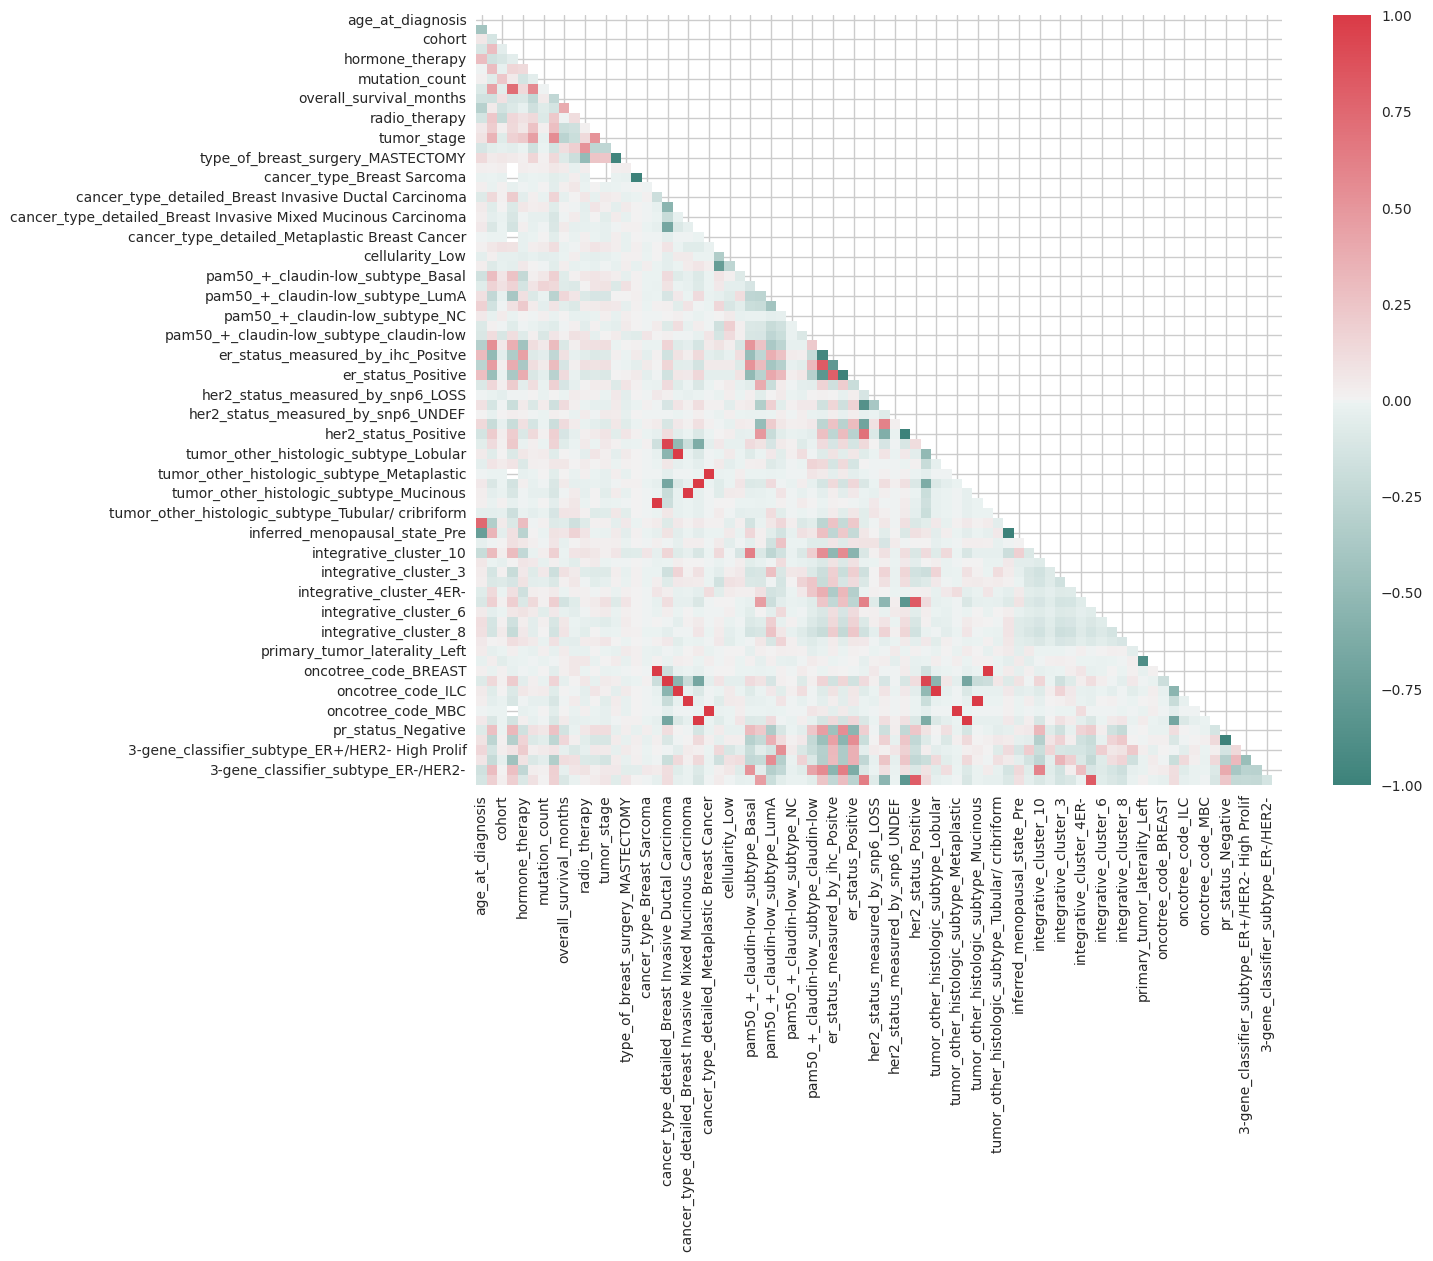

In [98]:

fig, axs = plt.subplots(figsize = (13, 10)) 
categorical_columns = clinical_attribute.select_dtypes(include=['object']).columns.tolist()
unwanted_columns = ['patient_id','death_from_cancer' ]
categorical_columns = [ele for ele in categorical_columns if ele not in unwanted_columns] 
no_id_clinical_df = pd.get_dummies(clinical_attribute.drop(['patient_id','death_from_cancer'],axis=1 ), columns= categorical_columns)
#no_id_clinical_df= clinical_df.drop('ID',axis=1 )
mask = np.triu(np.ones_like(no_id_clinical_df.corr(), dtype = np.bool))
sns.heatmap(no_id_clinical_df.corr(), ax = axs, mask = mask, cmap = sns.diverging_palette(180, 10, as_cmap = True))

### The relationship between the clinical attributes and survival 

In [103]:
corr_overall_survival = no_id_clinical_df.corr()['overall_survival'].sort_values(ascending = False)
corr_df = pd.DataFrame({'Correlation': corr_overall_survival})
corr_df.head(10)

,Correlation
overall_survival,1.000000
overall_survival_months,0.384467
type_of_breast_surgery_BREAST CONSERVING,0.187856
inferred_menopausal_state_Pre,0.170915
radio_therapy,0.112083
3-gene_classifier_subtype_ER+/HER2- Low Prolif,0.094463
pam50_+_claudin-low_subtype_claudin-low,0.091397
integrative_cluster_10,0.076256
pam50_+_claudin-low_subtype_LumA,0.065186
3-gene_classifier_subtype_ER-/HER2-,0.065135


In [104]:
corr_df.tail(10)

,Correlation
pam50_+_claudin-low_subtype_Her2,-0.091694
3-gene_classifier_subtype_ER+/HER2- High Prolif,-0.095318
nottingham_prognostic_index,-0.138000
cohort,-0.149645
tumor_size,-0.164361
lymph_nodes_examined_positive,-0.164498
inferred_menopausal_state_Post,-0.170915
type_of_breast_surgery_MASTECTOMY,-0.184259
tumor_stage,-0.188790
age_at_diagnosis,-0.303666


There is a direct relationship between certain clinical attributes and overall survival. For instance, clinical characteristics like the 3 gene classifier subtype, PAM50 Claudin low subtype, and the combination of PAM50 and Claudin low subtype LumA show a positive correlation with improved overall survival. This suggests that as these attributes increase or become more prominent, the likelihood of better survival rates also increases.

Conversely, there are clinical attributes that exhibit a negative correlation with overall survival. For instance, an increase in the age at diagnosis is associated with a decrease in survival rates. This indicates that older individuals may face greater challenges in terms of recovery and survival compared to younger patients.

Tumor size is another clinical factor that negatively correlates with survival rates. Larger tumors, typically seen in more advanced stages, are linked to a poorer prognosis. Smaller tumors, which tend to occur in earlier stages, are generally easier to treat and are associated with better survival outcomes.

Tumor stage also demonstrates a negative correlation with survival rates. As the tumor stage advances, the likelihood of lower survival rates increases. Advanced tumor stages often signify more aggressive disease and a greater difficulty in achieving successful treatment outcomes.

In [12]:
import pandas as pd

# Get the list of numerical columns
df_num = clinical_attribute.select_dtypes(include=['number']).columns.to_list()

# Create an empty dictionary to store counts
dic = {}

# Calculate the number of unique values for each numerical column
for i in df_num:
    dic[i] = clinical_attribute[i].nunique()

# Create a DataFrame by transposing the dictionary
cohort_counts_df = pd.DataFrame(dic, index=['Unique Values Count']).T

# Display the DataFrame
print(cohort_counts_df)


                               Unique Values Count
patient_id                                    1904
age_at_diagnosis                              1572
chemotherapy                                     2
cohort                                           5
neoplasm_histologic_grade                        3
hormone_therapy                                  2
lymph_nodes_examined_positive                   31
mutation_count                                  30
nottingham_prognostic_index                    310
overall_survival_months                       1685
overall_survival                                 2
radio_therapy                                    2
tumor_size                                     111
tumor_stage                                      5


In [18]:
# Identify the categorical variable 
cat_variables = ['chemotherapy', 'cohort','neoplasm_histologic_grade','hormone_therapy','overall_survival','radio_therapy']
cat_variables.extend(clinical_attribute.select_dtypes(include = ['object']))
clinical_attribute[cat_variables].astype('category').describe().T

,count,unique,top,freq
chemotherapy,1904,2,0,1508
cohort,1904.0,5.0,3.0,734.0
neoplasm_histologic_grade,1832.0,3.0,3.0,927.0
hormone_therapy,1904,2,1,1174
overall_survival,1904,2,0,1103
radio_therapy,1904,2,1,1137
type_of_breast_surgery,1882,2,MASTECTOMY,1127
cancer_type,1904,2,Breast Cancer,1903
cancer_type_detailed,1889,6,Breast Invasive Ductal Carcinoma,1500
cellularity,1850,3,High,939


In [24]:
import numpy as np

In [35]:
no_treatment = clinical_attribute[(clinical_attribute['chemotherapy'] == 0) & (clinical_attribute['hormone_therapy'] == 0) & (clinical_attribute['hormone_therapy'] ==0)]
print(f"Number of patients who had no treatment: {no_treatment.shape[0]}")
print(f"Proportion of survival in group that have no treatment: {np.mean(no_treatment['overall_survival']):.3f}")
print(f"Proportion of survival in the group using general treatment: {np.mean(clinical_attribute['overall_survival']):3f}")

Number of patients who had no treatment: 517
Proportion of survival in group that have no treatment: 0.443
Proportion of survival in the group using general treatment: 0.420693


There is no significant difference in survival rates between patients who receive treatment and those who do not. This observation might indeed indicate that the treatment provided does not appear to be significantly effective in improving overall survival for the patient population. 

In [50]:
clinical_attribute['tumor_stage']

0       2.0
1       1.0
2       2.0
3       2.0
4       2.0
       ... 
1899    NaN
1900    NaN
1901    NaN
1902    NaN
1903    NaN
Name: tumor_stage, Length: 1904, dtype: float64

In [16]:
import statistics

print(f"Mean age: {np.mean(clinical_attribute['age_at_diagnosis']):.3f}")
print("Most occurring tumour stage: " , statistics.mode(clinical_attribute['tumor_stage']))
print("Most occurring histoathological type:", statistics.mode(clinical_attribute['neoplasm_histologic_grade']))
print(f"Mean tumor diameter: {np.mean(clinical_attribute['tumor_size']):.3f}")
print(f"Probality of survival: {(len(clinical_attribute[clinical_attribute['overall_survival'] == 1])/clinical_attribute.shape[0]):.3f}")

Mean age: 61.087
Most occurring tumour stage:  2.0
Most occurring histoathological type: 3.0
Mean tumor diameter: 26.239
Probality of survival: 0.421


Overally,the patient who have breast cancer were 61 years old, their tumor cancer occured at the stage 2with 2 lymph noded examined positive and the tumor sizIn general, patients diagnosed with breast cancer at the age of 61, with cancer at stage 2, two positive lymph nodes, and a tumor size of 26, have an estimated 42% chance of survival of 26. The probability of survival is 42% 

In [19]:
clinical_attribute.drop(cat_variables, axis = 1).describe().T

,count,mean,std,min,25%,50%,75%,max
patient_id,1904.0,3921.982143,2358.478332,0.00,896.500,4730.500000,5536.250000,7299.00
age_at_diagnosis,1904.0,61.087054,12.978711,21.93,51.375,61.770000,70.592500,96.29
lymph_nodes_examined_positive,1904.0,2.002101,4.079993,0.00,0.000,0.000000,2.000000,45.00
mutation_count,1859.0,5.697687,4.058778,1.00,3.000,5.000000,7.000000,80.00
nottingham_prognostic_index,1904.0,4.033019,1.144492,1.00,3.046,4.042000,5.040250,6.36
overall_survival_months,1904.0,125.121324,76.334148,0.00,60.825,115.616667,184.716667,355.20
tumor_size,1884.0,26.238726,15.160976,1.00,17.000,23.000000,30.000000,182.00
tumor_stage,1403.0,1.750535,0.628999,0.00,1.000,2.000000,2.000000,4.00


### Relationship between genetics attributes and outcome 


In [51]:
genetics_feature_to_drop = clinical_df.columns[520:]
genetic_df = clinical_df.drop(genetics_feature_to_drop, axis = 1)
# droping clinical data 
genetics_drop = genetic_df.drop(genetic_df.columns[4:35], axis = 1)
genetics_drop = genetic_df.drop(['age_at_diagnosis', 'type_of_breast_surgery', 'cancer_type'], axis = 1)
genetics_drop = genetics_drop.iloc[:, :-174]
genetics_drop.head()

,patient_id,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,neoplasm_histologic_grade,her2_status_measured_by_snp6,...,tubb1,tubb4a,tubb4b,twist1,adgra2,afdn,aff2,agmo,agtr2,ahnak
0,0,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,Positive,3.0,NEUTRAL,...,0.7029,-0.0250,-0.4113,2.8096,2.8014,-0.0004,0.9673,0.3011,-0.8436,1.8227
1,2,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,Positive,3.0,NEUTRAL,...,0.8972,-0.1003,0.7791,-0.2273,-0.4462,-1.9854,0.5022,-0.9526,-1.8435,1.6662
2,5,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,Positive,2.0,NEUTRAL,...,0.3157,1.2084,-0.6572,0.1984,-1.0721,-0.9729,0.0515,0.1109,0.9874,-0.0154
3,6,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,Positive,2.0,NEUTRAL,...,8.4721,0.3142,-0.4413,0.1932,-1.0215,0.4553,-0.2354,0.4003,1.4839,0.3101
4,8,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,Positive,3.0,NEUTRAL,...,1.0188,-0.6606,-1.4697,0.4128,-1.5326,-0.4795,1.0052,0.9739,0.8825,-0.7598


In [60]:
genetic_attribute_to_drop = clinical_df.columns[520:]
genetic_df = clinical_df.drop(genetic_attribute_to_drop, axis = 1)

genetics_drop = genetic_df.drop(genetic_df.columns[4:35], axis = 1)
genetics_drop = genetics_drop.drop(['age_at_diagnosis', 'type_of_breast_surgery','cancer_type'], axis = 1)
df_genetic = genetics_drop.iloc[:,:-174]
df_genetic[df_genetic.columns[1:10]].describe().T
df_genetic['overall_survival'] = clinical_df.overall_survival
df_genetic.describe().T

,count,mean,std,min,25%,50%,75%,max
patient_id,1904.0,3.921982e+03,2358.478332,0.0000,896.500000,4730.50000,5536.250000,7299.0000
tp53,1904.0,6.302521e-07,1.000263,-2.4812,-0.666150,-0.03010,0.644750,4.2898
atm,1904.0,-2.100840e-07,1.000262,-3.1705,-0.660225,-0.00420,0.690150,3.8242
cdh1,1904.0,1.523109e-06,1.000263,-3.3237,-0.458600,0.11555,0.649800,2.8209
chek2,1904.0,7.463684e-18,1.000262,-2.6887,-0.738550,-0.13110,0.543125,4.5382
...,...,...,...,...,...,...,...,...
aff2,1904.0,-1.575630e-07,1.000261,-2.6108,-0.587375,-0.07790,0.490450,12.1414
agmo,1904.0,-6.827731e-07,1.000262,-3.3888,-0.637425,-0.00785,0.596600,12.7286
agtr2,1904.0,-1.050420e-07,1.000262,-3.2534,-0.666875,-0.05110,0.609075,4.7671
ahnak,1904.0,-2.678571e-06,1.000262,-5.1982,-0.544700,0.11440,0.630100,3.3290


In [53]:
max_genetics = df_genetic.max()
min_genetics = df_genetic.min()
std_genetics = df_genetic.std(axis = 0, skipna = True)
stat_genetics = pd.concat([max_genetics, std_genetics,min_genetics], keys = ["max", "std","min"], axis = 1)
stat_genetics.sort_values(by = 'max', ascending = True)

,max,std,min
overall_survival,1.0000,0.493800,0.0000
mmp11,2.0014,1.000263,-3.2487
gata3,2.2028,1.000263,-2.8126
erbb3,2.2761,1.000263,-5.2830
mapt,2.3416,1.000263,-2.0151
...,...,...,...
slco1b3,14.8651,1.000262,-3.2487
itgb3,15.3308,1.000263,-3.9635
hes5,17.1431,1.000262,-2.3126
tubb4a,18.6351,1.000263,-1.5539


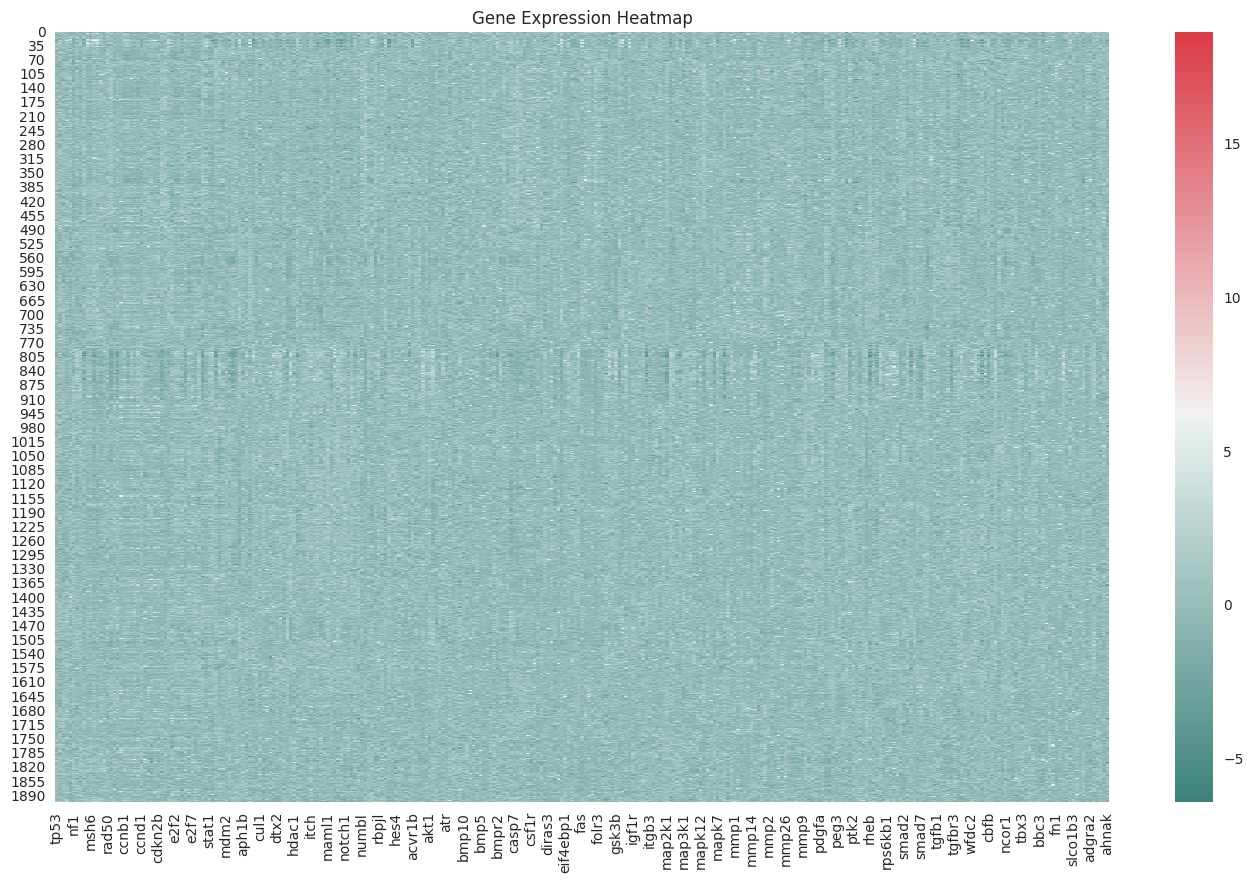

In [68]:
fig, ax = plt.subplots(figsize = (17,10))
sns.heatmap(df_genetic.drop(['patient_id','overall_survival'], axis = 1),
            ax = ax, cmap = sns.diverging_palette(180,10, as_cmap = True))
plt.title('Gene Expression Heatmap')

b, t = plt.ylim()
b+= 0.5
t -= 0.5
plt.ylim(b,t)
plt.show()

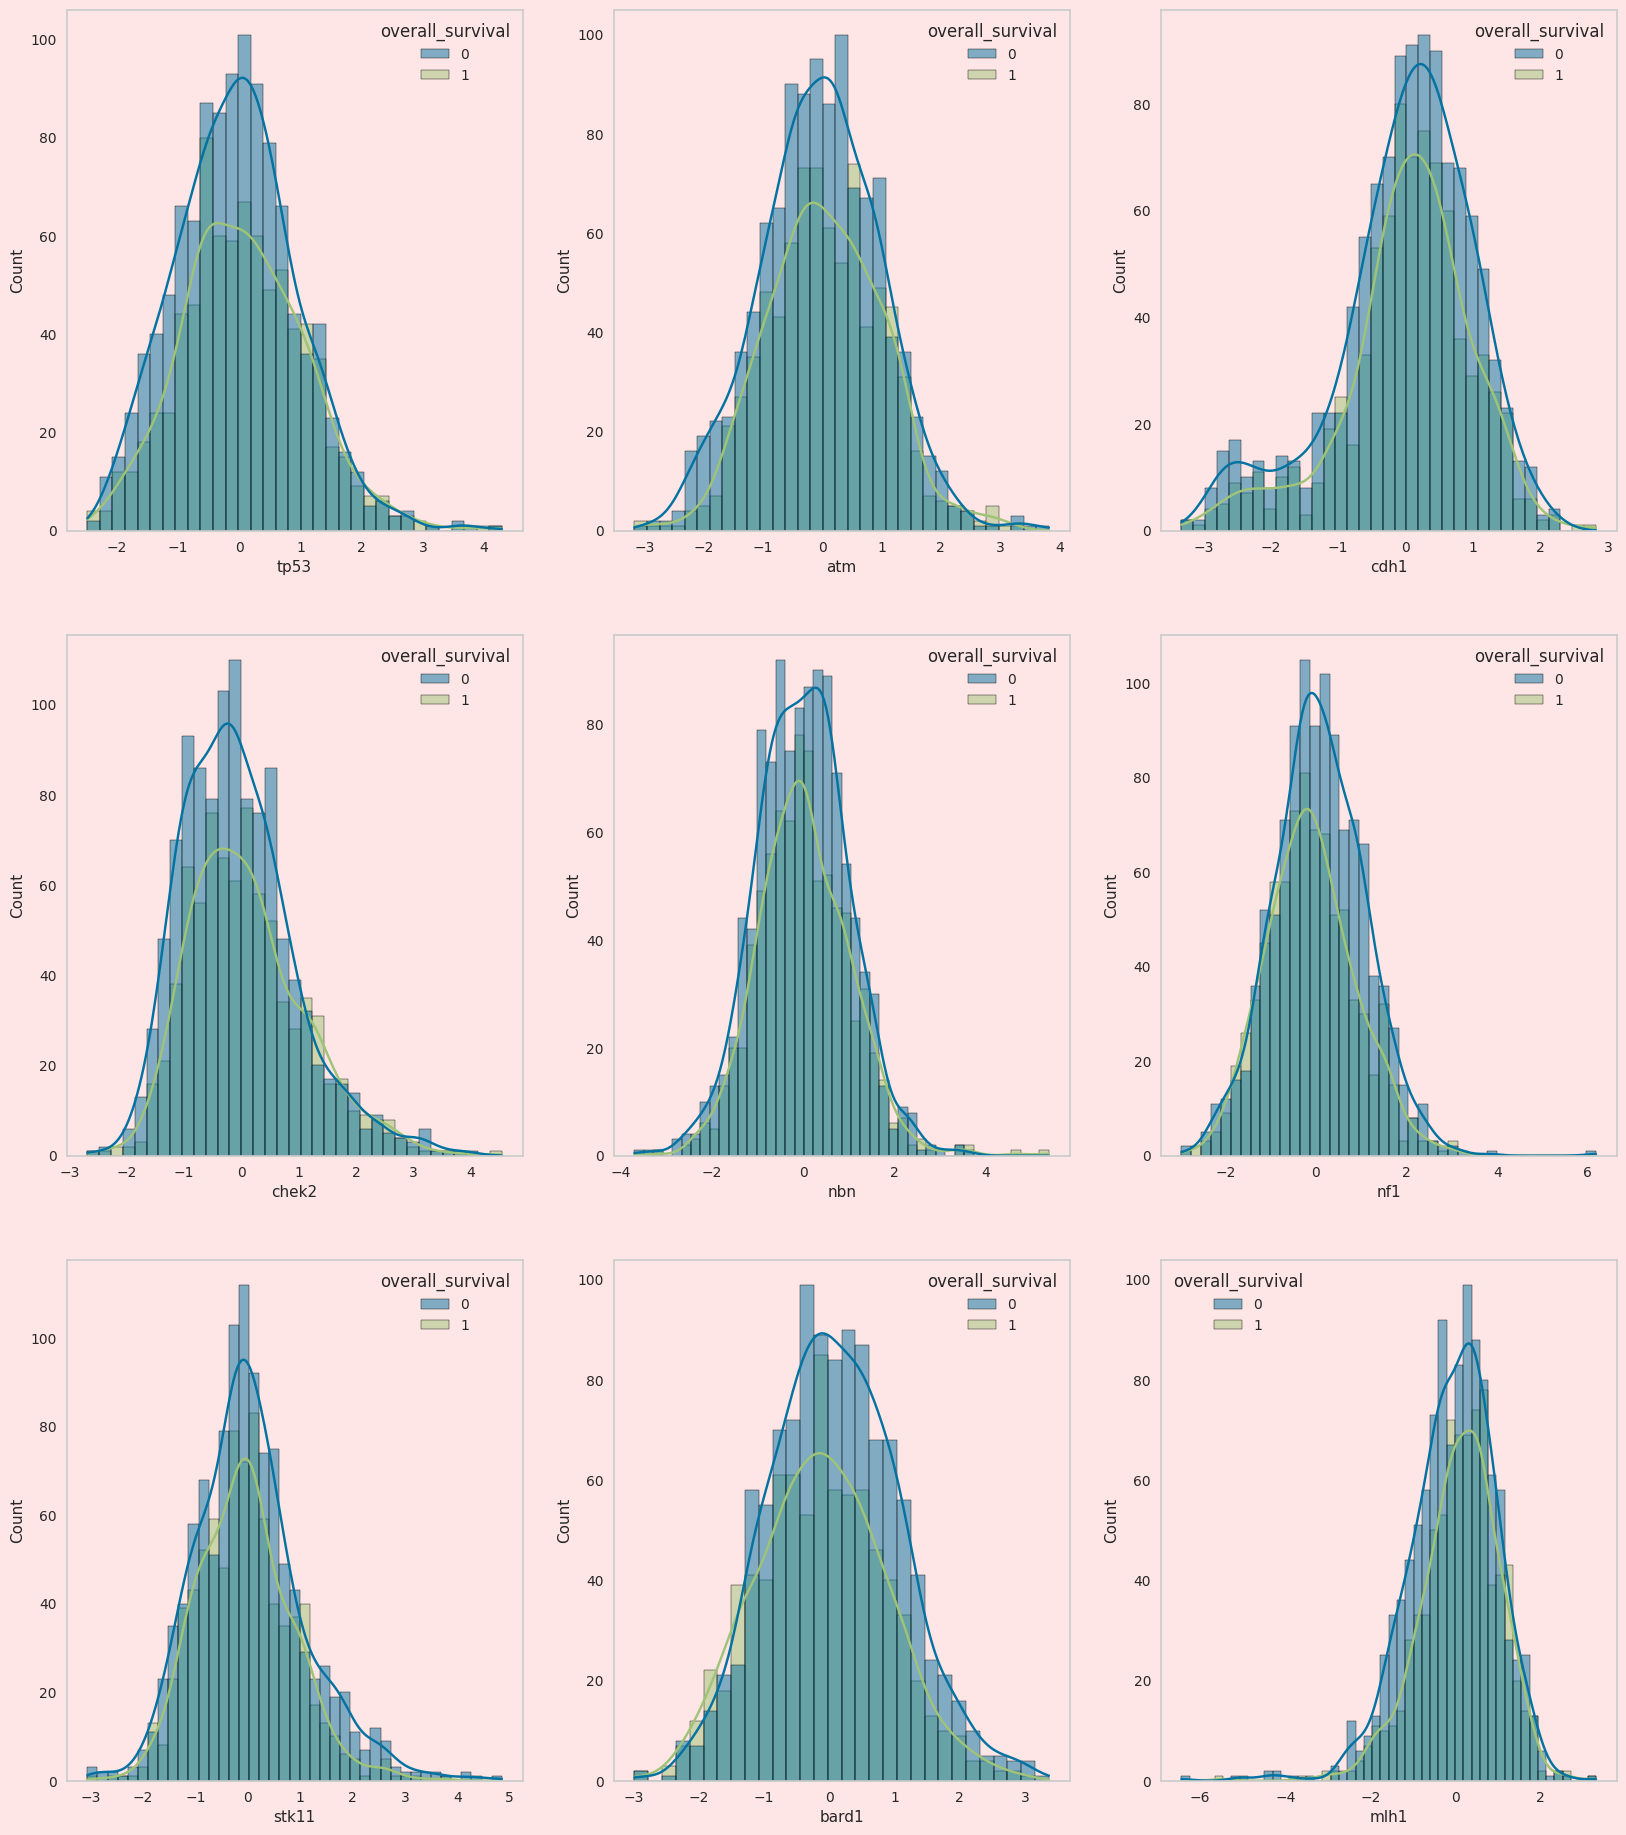

In [54]:
fig = plt.figure(figsize = (20,23))
background_color = "#ffe6e6"
color_palette = ["#800000", "#8000ff", "#6aac90", "#5833ff", "#da8829"]
fig.patch.set_facecolor(background_color)


genetics_list = df_genetic.drop("patient_id", axis= 1).iloc[:,:9].columns.to_list()

for i, gene in enumerate(genetics_list):
    plt.subplot(3,3, i + 1)
    sns.histplot(x = df_genetic[gene], hue = df_genetic['overall_survival'], kde = True)
    plt.gca().set_facecolor(background_color)  # Set the background color
    plt.grid(False)  # Turn off the grid
    
   

Text(0.5, 1.0, 'The Corelation of Gene with Overall Survival ')

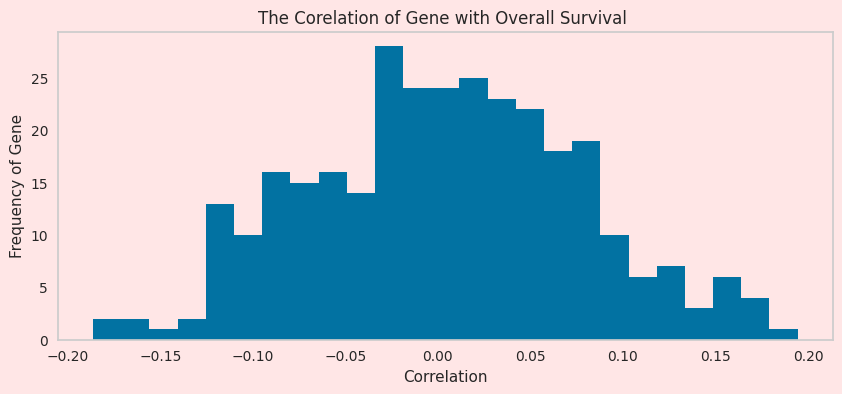

In [55]:
fig, ax = plt.subplots(figsize = (10,4))
background_color = "#ffe6e6"
color_palette = ["#800000", "#8000ff", "#6aac90", "#5833ff", "#da8829"]
fig.patch.set_facecolor(background_color)

corr_value = []
for corr in df_genetic.drop('patient_id', axis = 1).columns:
    corr = df_genetic[[corr, 'overall_survival']].corr()['overall_survival'][corr]
    corr_value.append(corr)
    plt.gca().set_facecolor(background_color)  # Set the background color
    plt.grid(False)  # Turn off the grid
    
corr_value.pop(-1)
ax.hist(corr_value,bins = 25)
ax.set_xlabel('Correlation')
ax.set_ylabel('Frequency of Gene')
ax.set_title('The Corelation of Gene with Overall Survival ')

Because the distribution of data in the two classes of survival are very similar with few outliers. It is evident that most features of generic data do not significantly correlate 

### The relationship between the mutation gene and the overall survival 

/tmp/ipykernel_32/496135080.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mutation_gene['overall_survival'] = clinical_df['overall_survival']


Text(0.5, 1.0, 'The Correlation of Mutation Gene Vs Overvall_Survival')

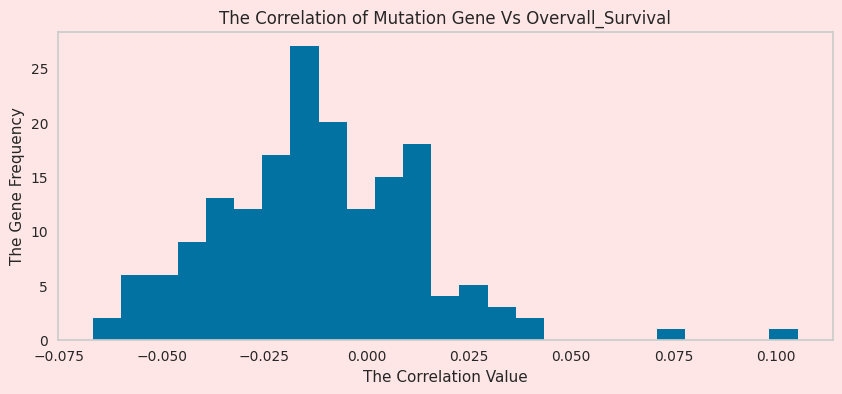

In [73]:
import pandas as pd

# Assuming you already have the clinical_df DataFrame

# Drop columns 4 to 519 and specific columns by name
mutation_gene = clinical_df.drop(columns=clinical_df.columns[4:520])
mutation_gene = mutation_gene.drop(columns=['age_at_diagnosis', 'type_of_breast_surgery', 'cancer_type'])

# Loop through columns and convert them to integers
for mu_gene in mutation_gene.columns[1:]:
    mutation_gene[mu_gene] = pd.to_numeric(mutation_gene[mu_gene], errors='coerce').fillna(1).astype(int)

mutation_gene['overall_survival'] = clinical_df['overall_survival'] 

fig,ax = plt.subplots(figsize = (10,4))
background_color = "#ffe6e6"
color_palette = ["#800000", "#8000ff", "#6aac90", "#5833ff", "#da8829"]
fig.patch.set_facecolor(background_color)

corr = []
for gene in mutation_gene.drop('patient_id', axis = 1).columns:
    corr_value = mutation_gene[[gene, 'overall_survival']].corr()['overall_survival'][gene]
    corr.append(corr_value)
    plt.gca().set_facecolor(background_color)  # Set the background color
    plt.grid(False) 
    
corr.pop(-1)   
ax.hist(corr, bins = 25)
ax.set_xlabel("The Correlation Value")
ax.set_ylabel('The Gene Frequency')
ax.set_title("The Correlation of Mutation Gene Vs Overvall_Survival")

In [72]:
# using the stratified k fold that will split the data set into subsets randomly 

mutation_gene.head()


,patient_id,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,ahnak_mut,...,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut,overall_survival
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,8,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


some genes had much more mutations than other genes. For example: PIK3Ca( coding mutation in 40.1% of the samples) and TP53( 35.4%) dominated the mutation landscape. Only five other genes harboured coding mutation in at least 10% of the sample: MUC16(16.8%), AHNAK2(16.2%), SYNE1(12.0%), KMT2C(also known as MLL2, 11.4%) cand GATA(11.1%) 

In [79]:
print(f"Maximum correlation: {max(corr):.3f}")
print(f"Minimum correlation: {min(corr):.3f}")
print(f"Mean correlation: {np.mean(corr):.3f}")

Maximum correlation: 0.105
Minimum correlation: -0.067
Mean correlation: -0.012


There is no correlation at all between survival and mutation. We will exclude the mutations from the machine learning model, but maybe include it later when we want to tunning hyperparameter model to increase accuracy 


# Preprocessing and Modeling 

In [244]:
# Using a stratified k fold to execute on the training set and evaluate performance on the test set 

kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

In [245]:
print("Baseline accuracy")
print(clinical_attribute['overall_survival'].value_counts()/clinical_attribute['overall_survival'].count())

Baseline accuracy
overall_survival
0    0.579307
1    0.420693
Name: count, dtype: float64


In [246]:
import pandas as pd

# Assuming 'clinical_attribute' is your DataFrame
categorical_columns = clinical_attribute.select_dtypes(include=['object']).columns.tolist()
unwanted_columns = ['patient_id', 'death_from_cancer']
categorical_columns = [col for col in categorical_columns if col not in unwanted_columns]

dummies_df = pd.get_dummies(clinical_attribute.drop(['patient_id','death_from_cancer'], axis=1), columns=categorical_columns, dummy_na=True)
dummies_df.dropna(inplace=True)
dummies_df = dummies_df.astype("int")


In [247]:
X_dummies = dummies_df.drop("overall_survival", axis = 1)
y_dummies = dummies_df['overall_survival']

In [248]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X_dummies)
X_scaled = pd.DataFrame(X_scaled, columns = X_dummies.columns)


In [253]:
X_scaled.dropna(inplace = True)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_dummies,test_size  = 0.33, random_state = 42)

In [ ]:
# This class is used to combine multiple models and calculate the probability of their predictions.from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.pipeline import _name_estimators
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
import numpy as np

class MajorityVoteClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, classifiers, vote='classlabel', weights=None):
        self.classifiers = classifiers
        self.named_classifiers = {key: value for key, value in _name_estimators(classifiers)}
        self.vote = vote
        self.weights = weights

    def fit(self, X, y):
        self.lablenc_ = LabelEncoder()
        self.lablenc_.fit(y)
        self.classes_ = self.lablenc_.classes_
        self.classifiers_ = []
        
        for clf in self.classifiers:
            fitted_clf = clone(clf).fit(X, self.lablenc_.transform(y))
            self.classifiers_.append(fitted_clf)
        
        return self

    def predict_proba(self, X):
        probas = np.asarray([clf.predict_proba(X) for clf in self.classifiers_])
        avg_proba = np.average(probas, axis=0, weights=self.weights)
        return avg_proba

    def predict(self, X):
        if self.vote == 'probability':
            maj_vote = np.argmax(self.predict_proba(X), axis=1)
        else:
            predictions = np.asarray([clf.predict(X) for clf in self.classifiers_]).T
            maj_vote = np.apply_along_axis(lambda x: np.argmax(np.bincount(x, weights=self.weights)), axis=1, arr=predictions)
        
        maj_vote = self.lablenc_.inverse_transform(maj_vote)
        return maj_vote


In [254]:
def model_metrics(model, kfold, X_train, X_test, y_train, y_test):
    
    model.fit(X_train, y_train)
    
    results = cross_val_score(model, X_train, y_train, cv = kfold)
    print(f"CV score: {results}")
    print(f"CV standard Deviation: {results.std()}")
    print(f"CV mean values: {results.mean()}")
    print(f"CV train score: {model.score(X_train, y_train)}")
    print(f"CV test score: {model.score(X_test, y_test)}")
    
    pred = model.predict(X_test)
    print()
    print("Confusion Matrix")
    print()
    print(confusion_matrix(y_test,pred))
    print("Classification Report: ")
    print(classification_report(y_test,pred))
    test_score = model.score(X_test, y_test)
    test_pred = model.predict(X_test)
    
    return test_score, test_pred, results.mean()

In [37]:
BOLD = '\033[1m'
END = '\033[0m'

In [279]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.svm import SVC

def model(kfold, X_train, X_test, y_train, y_test):
    # Using KNeighborsClassifier
    print(); print(BOLD + 'KNeighborsClassifier' + END)
    params_knn = {"n_neighbors": [5, 15, 25, 30, 35, 40, 100],
                  "weights": ["uniform", "distance"]}
    knn = GridSearchCV(KNeighborsClassifier(), params_knn, n_jobs=-1, cv=4)
    knn_test_score, knn_pred, knn_results = model_metrics(knn, kfold, X_train, X_test, y_train, y_test)

    # Using Logistic regression
    print(); print(BOLD + 'Logistic Regression' + END)
    params_lg = {"penalty": ["l1", "l2"]}
    lg = GridSearchCV(LogisticRegression(random_state=42), params_lg, cv=4)
    lg_test_score, lg_pred, lg_results = model_metrics(lg, kfold, X_train, X_test, y_train, y_test)

    # Using Decision Tree
    print(); print(BOLD + 'Decission Tree' + END)
    decission_tree = DecisionTreeClassifier(random_state=42)
    dt_test_score, dt_pred, dt_results = model_metrics(decission_tree, kfold, X_train, X_test, y_train, y_test)

    # Using Random Forest
    print(); print(BOLD + 'Random Forest' + END)
    rf_params = {'max_depth': [2, 3, 5, 7, 8]}
    randomForest = RandomForestClassifier(n_estimators=100)
    randomForest = GridSearchCV(randomForest, param_grid=rf_params, cv=5, verbose=1)
    rf_test_score, rf_pred, rf_results = model_metrics(randomForest, kfold, X_train, X_test, y_train, y_test)

    # Using Extra Trees
    print(); print(BOLD + 'Extra Tree' + END)
    et_params = {'max_depth': [1, 2, 3, 4, 5, 8]}
    extra_trees = ExtraTreesClassifier(random_state=42)
    extra_trees = GridSearchCV(extra_trees, param_grid=et_params, cv=5, verbose=1)
    et_test_score, et_pred, et_results = model_metrics(extra_trees, kfold, X_train, X_test, y_train, y_test)

    # Using Adaboost
    print(); print(BOLD + 'Adaboost' + END)
    ada_boost = AdaBoostClassifier(random_state=42)
    ab_test_score, ab_pred, ab_results = model_metrics(ada_boost, kfold, X_train, X_test, y_train, y_test)

    # Using SVC
    print(); print(BOLD + 'SVC' + END)
    svc = SVC(random_state=42)
    svc_test_score, svc_pred, svc_results = model_metrics(svc, kfold, X_train, X_test, y_train, y_test)
    
    # Using essemble model (including KNN, Logistic Regression, Decission Tree)
    print(); print(BOLD + 'Essemble Model 1' + END)
    mv_clf_1 = MajorityVoteClassifier(classifiers = [knn, lg, decission_tree])
    ess1_test_score, ess1_pred, ess1_results = model_metrics(mv_clf_1, kfold, X_train, X_test, y_train, y_test)
    
    # Using essemble model (including KNN, Logistic Regression, Decission Tree, AdaBoost)
    print(); print(BOLD + 'Essemble Model 2' + END)
    mv_clf_2 = MajorityVoteClassifier(classifiers = [knn, lg, decission_tree, ada_boost])
    ess2_test_score, ess2_pred, ess2_results = model_metrics(mv_clf_2, kfold, X_train, X_test, y_train, y_test)
    
    color_palette = ["#800000", "#8000ff", "#6aac90", "#5833ff", "#da8829", "#da8829", "#da8829"]
    name_model = ['KNN', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'Extra Trees', 'AdaBoost', 'SVC', 'Essemble Model 1', 'Essemble Model 2']

    scores_train_model = [knn_results, lg_results, dt_results, rf_results, et_results, ab_results, svc_results, ess1_results, ess2_results]
    scores_test_model = [knn_test_score, lg_test_score, dt_test_score, rf_test_score, et_test_score, ab_test_score, svc_test_score, ess1_test_score, ess2_test_score]
    score_pred_model = [knn_pred, lg_pred, dt_pred, rf_pred, et_pred, ab_pred, svc_pred, ess1_pred, ess2_pred]

    fig, ax = plt.subplots(1, 2, figsize=(17, 5))

    # Plot the barplot for training and test scores
    sns.barplot(x=name_model, y=scores_train_model, color=color_palette[2], ax=ax[0], label='Train Score')
    sns.barplot(x=name_model, y=scores_test_model, color=color_palette[1], ax=ax[0], label='Test Score')
    ax[0].set_xlabel('Name of Methods')
    ax[0].set_ylabel('Score')
    ax[0].set_title('Comparison of Train Score and Test Score')
    ax[0].legend()

    # Plot ROC curves for each model
    for label, pred_score in zip(name_model, score_pred_model):
        fpr, tpr, threshold = roc_curve(y_test.values, pred_score)
        roc_auc = auc(fpr, tpr)
        ax[1].plot(fpr, tpr, label=label + ' (AUC = {:.2f})'.format(roc_auc), linewidth=2)

    ax[1].plot([0, 1], [0, 1], 'k--', linewidth=2)
    ax[1].set_xlim([-0.05, 1.0])
    ax[1].set_ylim([-0.05, 1.05])
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
    ax[1].set_title('ROC Curve for Different Models')
    ax[1].legend()

    plt.tight_layout()
    plt.show()



KNeighborsClassifier
CV score: [0.65909091 0.68181818 0.62285714 0.62857143 0.68      ]
CV standard Deviation: 0.024864293506627944
CV mean values: 0.6544675324675324
CV train score: 1.0
CV test score: 0.6327944572748267

Confusion Matrix

[[191  62]
 [ 97  83]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.66      0.75      0.71       253
           1       0.57      0.46      0.51       180

    accuracy                           0.63       433
   macro avg       0.62      0.61      0.61       433
weighted avg       0.63      0.63      0.62       433


Logistic Regression
CV score: [0.76704545 0.72727273 0.74857143 0.76571429 0.76571429]
CV standard Deviation: 0.015392985546926882
CV mean values: 0.7548636363636363
CV train score: 0.7970353477765109
CV test score: 0.7344110854503464

Confusion Matrix

[[196  57]
 [ 58 122]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.77     

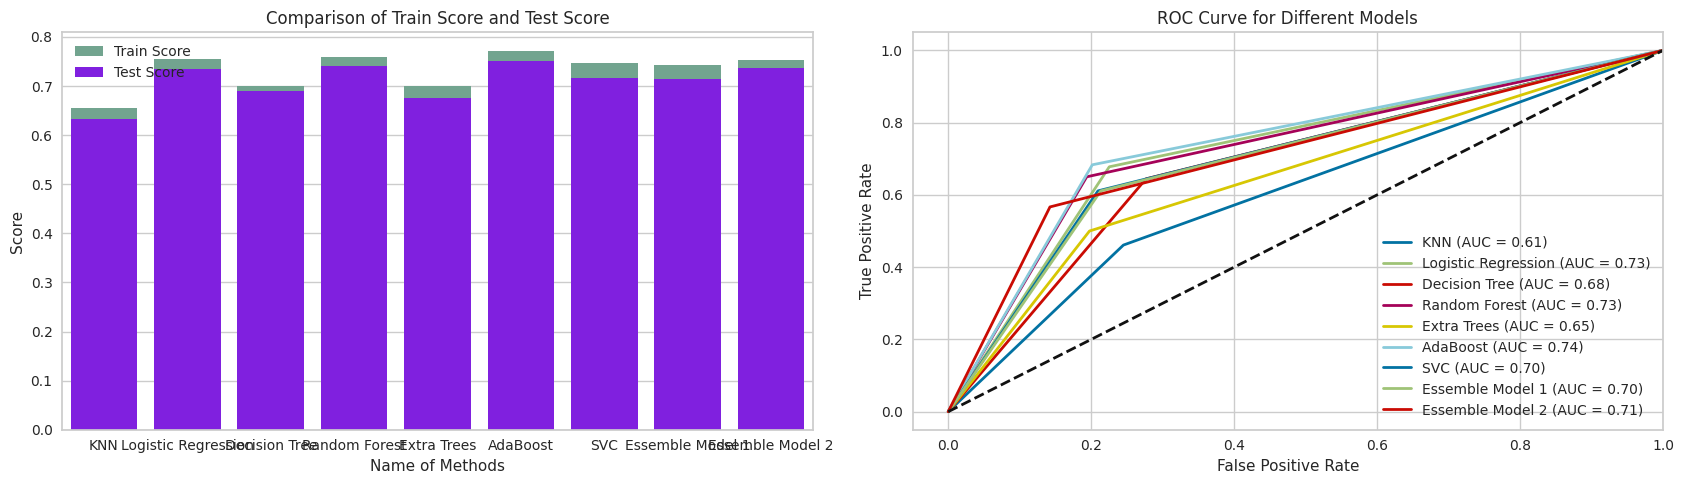

In [280]:
model(kfold, X_train, X_test, y_train, y_test )


After executing the model with a variety of models, it is evident that logistic regression achieves an accuracy of 79% on the training set and 72% on the test set. Although this model exhibits some overfitting, it outperforms the others. To improve its performance, fine-tuning, augmenting the dataset, handling outliers, or eliminating unnecessary data may be necessary. The precision of 0.77 indicates that the model can accurately predict survival rates 77% of the time, and the recall of 0.68 suggests that it can accurately identify between survival and mortality rates 68% of the time.